
# Thất nghiệp tại đất nước Ấn Độ trong thời kỳ Covid19

### Mục tiêu  

* Để biết được tác động của Covid19 đến thị trường việc làm.

* Bang nào ít bị ảnh hưởng và bang nào bị ảnh hưởng nhiều


##  Tập dữ liệu này chứa tỷ lệ thất nghiệp của tất cả các bang ở Ấn Độ

* States = Các bang ở Ấn Độ
* Date = date which the unemployment rate observed
* Frequency = Tần suất đo (Hàng tháng)
* Estimated Unemployment Rate (%) = Tỷ lệ người thất nghiệp ở mỗi bang
* Estimated Employed = Số lượng người thất nghiệp
* Estimated Labour Participation Rate (%) = Tỉ lệ người trong độ tuổi lao động từ 16 tuổi đến 64 tuổi
* longtitude: kinh độ
* latitude: vĩ độ




# Index

* <a href="#Data-Import">Data Import</a>
* <a href="#Stats">Stats</a>
* <a href="#Data-exploratory-Analysis">Data exploratory Analysis</a>
* <a href="#Impact-of-Lockdown-on-States-Estimated-Employed">Impact-of-Lockdown-on-States-Estimated-Employed</a>


In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import calendar

In [2]:
import datetime as dt

import plotly.io as pio
pio.templates

Templates configuration
-----------------------
    Default template: 'plotly'
    Available templates:
        ['ggplot2', 'seaborn', 'simple_white', 'plotly',
         'plotly_white', 'plotly_dark', 'presentation', 'xgridoff',
         'ygridoff', 'gridon', 'none']

In [3]:
import plotly.express as px
import plotly.graph_objects as go
import plotly.figure_factory as ff
from IPython.display import HTML

# Data Import

In [4]:

df = pd.read_csv('Unemployment_Rate_upto_11_2020.csv')

In [5]:
df.head()

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Region.1,longitude,latitude
0,Andhra Pradesh,31-01-2020,M,5.48,16635535,41.02,South,15.9129,79.74
1,Andhra Pradesh,29-02-2020,M,5.83,16545652,40.90,South,15.9129,79.74
2,Andhra Pradesh,31-03-2020,M,5.79,15881197,39.18,South,15.9129,79.74
3,Andhra Pradesh,30-04-2020,M,20.51,11336911,33.10,South,15.9129,79.74
4,Andhra Pradesh,31-05-2020,M,17.43,12988845,36.46,South,15.9129,79.74


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 267 entries, 0 to 266
Data columns (total 9 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Region                                    267 non-null    object 
 1    Date                                     267 non-null    object 
 2    Frequency                                267 non-null    object 
 3    Estimated Unemployment Rate (%)          267 non-null    float64
 4    Estimated Employed                       267 non-null    int64  
 5    Estimated Labour Participation Rate (%)  267 non-null    float64
 6   Region.1                                  267 non-null    object 
 7   longitude                                 267 non-null    float64
 8   latitude                                  267 non-null    float64
dtypes: float64(4), int64(1), object(4)
memory usage: 18.9+ KB


In [7]:
df.isnull().sum()

Region                                      0
 Date                                       0
 Frequency                                  0
 Estimated Unemployment Rate (%)            0
 Estimated Employed                         0
 Estimated Labour Participation Rate (%)    0
Region.1                                    0
longitude                                   0
latitude                                    0
dtype: int64

In [8]:
df.columns =['States','Date','Frequency','Estimated Unemployment Rate','Estimated Employed','Estimated Labour Participation Rate','Region','longitude','latitude']

In [9]:
df['Date'] = pd.to_datetime(df['Date'],dayfirst=True) # chuchuyển đổi cột 'Date' thành dạng datetime. dayfirst để hiển thị ngày trước (ngày/tháng/năm)

In [10]:
df['Frequency']= df['Frequency'].astype('category') # Chuyển thành category

In [11]:
df['Month'] =  df['Date'].dt.month
# Kết quả của việc trích xuất thành phần tháng từ cột 'Date' được gán cho cột mới được tạo ra là 'Month' trong DataFrame 'df'.


In [12]:
df['Month_int'] = df['Month'].apply(lambda x : int(x)) # chuyển đổi các giá trị của cột Month thành số nguyên

In [13]:

df['Month_name'] =  df['Month_int'].apply(lambda x: calendar.month_abbr[x])
'''
Kết quả của việc áp dụng hàm lambda này được gán cho cột mới trong DataFrame, 'Month_name'. Cột này chứa các giá trị tên viết tắt của tháng,
tương ứng với các giá trị số nguyên trong cột 'Month_int'. Điều này giúp làm cho dữ liệu dễ đọc và hiểu hơn, đặc biệt trong các biểu đồ hoặc báo cáo mà sử dụng thông tin về thời gian.
'''

"\nKết quả của việc áp dụng hàm lambda này được gán cho cột mới trong DataFrame, 'Month_name'. Cột này chứa các giá trị tên viết tắt của tháng,\ntương ứng với các giá trị số nguyên trong cột 'Month_int'. Điều này giúp làm cho dữ liệu dễ đọc và hiểu hơn, đặc biệt trong các biểu đồ hoặc báo cáo mà sử dụng thông tin về thời gian.\n"

In [14]:
df['Region'] = df['Region'].astype('category')

In [15]:
df.drop(columns='Month',inplace=True)
df.head(3)

,States,Date,Frequency,Estimated Unemployment Rate,Estimated Employed,Estimated Labour Participation Rate,Region,longitude,latitude,Month_int,Month_name
0,Andhra Pradesh,2020-01-31,M,5.48,16635535,41.02,South,15.9129,79.74,1,Jan
1,Andhra Pradesh,2020-02-29,M,5.83,16545652,40.90,South,15.9129,79.74,2,Feb
2,Andhra Pradesh,2020-03-31,M,5.79,15881197,39.18,South,15.9129,79.74,3,Mar


# Stats

In [16]:
 df_stats = df[['Estimated Unemployment Rate',
       'Estimated Employed', 'Estimated Labour Participation Rate']]


round(df_stats.describe().T,2)

,count,mean,std,min,25%,50%,75%,max
Estimated Unemployment Rate,267.0,12.24,10.80,0.50,4.84,9.65,16.76,75.85
Estimated Employed,267.0,13962105.72,13366318.36,117542.00,2838930.50,9732417.00,21878686.00,59433759.00
Estimated Labour Participation Rate,267.0,41.68,7.85,16.77,37.26,40.39,44.06,69.69


In [17]:
region_stats = df.groupby(['Region'])[['Estimated Unemployment Rate','Estimated Employed','Estimated Labour Participation Rate']].mean().reset_index()

region_stats = round(region_stats,2)


region_stats

C:\Users\DELL\AppData\Local\Temp\ipykernel_23388\2789248630.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  region_stats = df.groupby(['Region'])[['Estimated Unemployment Rate','Estimated Employed','Estimated Labour Participation Rate']].mean().reset_index()


,Region,Estimated Unemployment Rate,Estimated Employed,Estimated Labour Participation Rate
0,East,13.92,19602366.90,40.11
1,North,15.89,13072487.92,38.70
2,Northeast,10.95,3617105.53,52.06
3,South,10.45,14040589.33,40.44
4,West,8.24,18623512.72,41.26


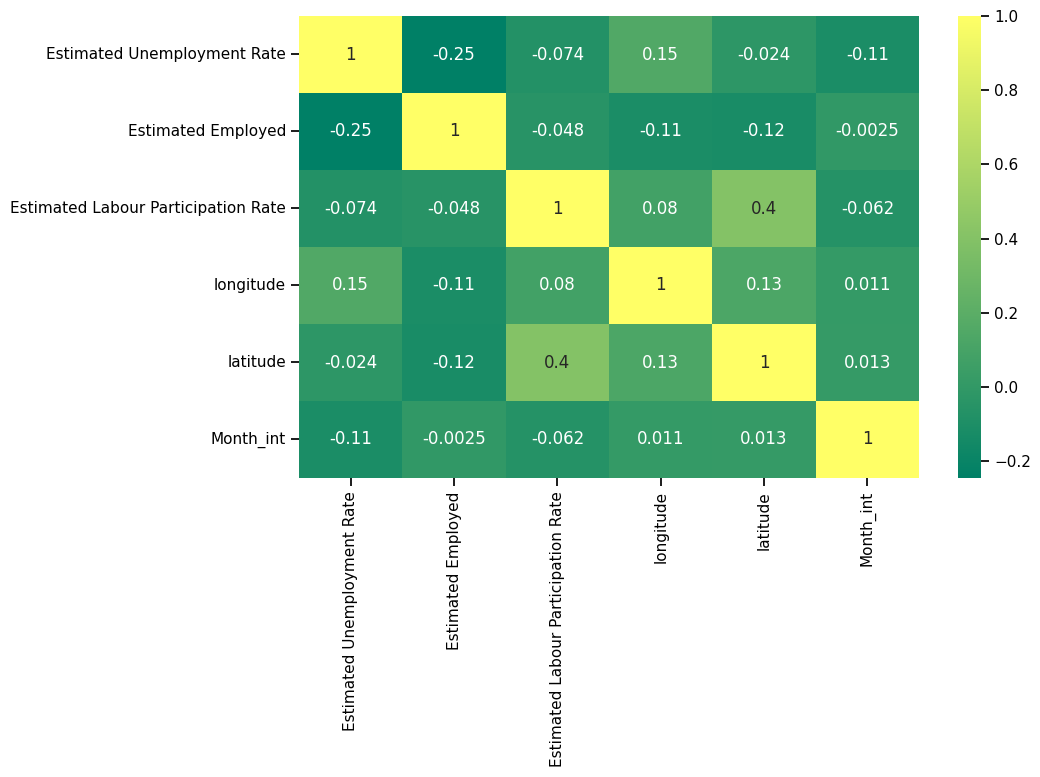

In [18]:
# Đức
heat_maps = df[['Estimated Unemployment Rate',
       'Estimated Employed', 'Estimated Labour Participation Rate',
       'longitude', 'latitude', 'Month_int']]

heat_maps = heat_maps.corr()

plt.figure(figsize=(10,6))
sns.set_context('notebook',font_scale=1)
sns.heatmap(heat_maps, annot=True,cmap='summer');


### Vì sao mối tương quan giữa longtitude(vị trí địa lý của khu vực, được đo bằng vĩ độ) với Estimated Labour Participation Rate(Tỉ lệ người trong độ tuổi lao động từ 16 tuổi đến 64 tuổi) lại cao ?

- vị trí địa lý có thể ảnh hưởng đến mức độ tham gia vào lực lượng lao động trong các khu vực (các tỉnh thành phố lớn trung tâm kinh tế, các thành phố có nhiều khu công nghiệp)

# Data exploratory Analysis

In [19]:
# Đạt
fig = px.box(df,x='States',y='Estimated Unemployment Rate',color='States',title='Unemployment rate',template='plotly')
fig.update_layout(xaxis={'categoryorder':'total descending'})
fig.show()

# The below box shows unemployement rate in each state in India

 Có những bang nào xuất hiện nhiều outliers (các giá trị ngoại lệ) trong dữ liệu thất nghiệp không? Các outliers này có thể là do những yếu tố nào?

Dựa vào biểu đồ ta thấy tỉ lệ thất nghiệp của các bang được phân bổ khá đồng đều. Nhưng ta có thể thấy hầu hết các bang đều có một vài điểm ngoại lệ. Các ngoại lệ có thể là do dữ liệu của chúng em là tỉ lệ thất nghiệp có bao gồm dữ liệu từ Covid-19 nên những điểm dữ liệu ấy biểu hiện cho các tháng tỉ lệ cao bất thường vì dịch.

In [20]:
# Bảo
fig = px.scatter_matrix(df,template='plotly',
    dimensions=['Estimated Unemployment Rate','Estimated Employed',
                'Estimated Labour Participation Rate'],
    color='Region')
fig.show()

- Tổng quát: Hãy nêu lên sự phân bố dữ liệu của 2 cột Estimated Unemployment Rate(Tỷ lệ người thất nghiệp ở mỗi bang) và Estimated Employed(Số lượng người thất nghiệp) ?
- Cụ thể: Tỉ lể người trong độ tuổi lao động của mỗi vùng nằm trong khoanrng bao nhiêu phần trăm và số số lượng người lao động của từng vùng phân bố trong khoảng bao nhiêu triệu người

Câu trả lời:
- Có tổng cộng 5 màu tương ứng với 5 vùng, mỗi vùng sẽ có một màu khác nhau
- Nhìn vào biểu đồ ta thấy, vùng đông bắc, tỉ lệ người trong độ tuổi người lao động nằm trong khoảng từ 40 -> 60% và số lượng và số lượng người lao động trong khoảng 2-3 triệu người

=> Ta có thể thấy vùng này có khá ít người so với mặt bằng chung nhưng tỷ lệ người trong độ tuổi lao động lại là lớn nhất
=> Đây là ....

In [21]:
# Đạt
plot_ump = df[['Estimated Unemployment Rate','States']]

df_unemp = plot_ump.groupby('States').mean().reset_index()

df_unemp = df_unemp.sort_values('Estimated Unemployment Rate')

fig = px.bar(df_unemp, x='States',y='Estimated Unemployment Rate',color='States',
            title='Average Unemployment Rate in each state',template='plotly')

fig.show()

Bang nào có tỷ lệ thất nghiệp trung bình cao nhất dựa trên biểu đồ bar chart?


Từ biểu đồ bar chart ta dễ dàng thấy được rằng bang Haryana là bang có tỉ lệ thất nghiệp trung bình cao nhất.

In [22]:
# Cường
fig = px.bar(df, x='Region',y='Estimated Unemployment Rate',animation_frame = 'Month_name',color='States',
            title='Unemployment rate across region from Jan.2020 to Oct.2020', height=700,template='plotly')

fig.update_layout(xaxis={'categoryorder':'total descending'})

fig.layout.updatemenus[0].buttons[0].args[1]["frame"]["duration"] = 2000

fig.show()

Có sự biến động như thế nào về tỷ lệ thất nghiệp qua các khu vực (Region) từ tháng 1/2020 đến tháng 10/2020?

Dựa vào biểu đồ ta thấy rằng hầu hết từ tháng 1 đến tháng 10 thì khu vực North luôn giữ tỉ lệ thất nghiệp cao nhất, các khu vực còn lại có sự thay đổi nhưng không đáng kể. Nhưng có sự thay đổi lớn về tỉ lệ thất nhiệp của South và East vào tháng 4 đã vượt qua North trở thành khu vực có tỉ lệ thất nghiệp cao nhất và nhì. Hai tháng 4 và 5 ghi nhận sự tăng cao tỉ lệ của tất cả các vùng nhưng ngay các tháng sau đó tỉ lệ giảm dần và duy trì tình hình như ba tháng đầu.

In [23]:
unemplo_df = df[['States','Region','Estimated Unemployment Rate','Estimated Employed','Estimated Labour Participation Rate']]

unemplo = unemplo_df.groupby(['Region','States'])['Estimated Unemployment Rate'].mean().reset_index()


C:\Users\DELL\AppData\Local\Temp\ipykernel_23388\3906838429.py:3: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



In [24]:
# Đức
fig = px.sunburst(unemplo, path=['Region','States'], values='Estimated Unemployment Rate',
                  color_continuous_scale='Plasma',title= 'unemployment rate in each region and state',
                  height=650,template='ggplot2')


fig.show()

c:\Users\DELL\AppData\Local\Programs\Python\Python310\lib\site-packages\plotly\express\_core.py:1706: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.

c:\Users\DELL\AppData\Local\Programs\Python\Python310\lib\site-packages\plotly\express\_core.py:1706: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



Liệu có sự chênh lệch lớn về tỷ lệ thất nghiệp giữa các bang trong cùng một khu vực không?

Nhìn vào biểu đồ ta có thể thấy rằng tỉ lệ thất nghiệp của hầu hết các bang trong mỗi vùng miền tương đồng nhau. Trong đó, North là miền có tỉ lệ thất nghiệp cao nhất và tại mỗi miền đều có một bang có tỉ lệ thất nghiệp vượt trội so với các bang còn lại trong vùng với North là bang Haryana, West là Goa, Northeast là Tripura, East là Jharkhand và Bihar, South là bang Puducherry. Điều này chứng tỏ tại mỗi vùng miền luôn tồn tại một bang có thể thiếu hụt cơ hội việc làm hoặc là có tỉ lệ người nghèo đói và nhiều khu ổ chuột hoặc cũng có thể số lượng việc làm không đáp ứng được so với số lượng dân lao động nhất là với đất nước đông dân như Ấn Độ. Những điều này dẫn tới việc không có sự ổn định về việc làm nói riêng và tình hình kinh tế nói chung gây ra chênh lệch lớn về tỉ lệ.


# Impact of Lockdown on States Estimated Employed


* On 24 March 2020, the Government of India under Prime Minister Narendra Modi ordered a nationwide lockdown for 21 days



In [25]:
# Bảo
fig = px.scatter_geo(df,'longitude', 'latitude', color="Region",
                     hover_name="States", size="Estimated Unemployment Rate",
                     animation_frame="Month_name",scope='asia',template='plotly',title='Impack of lockdown on employement across regions')

fig.layout.updatemenus[0].buttons[0].args[1]["frame"]["duration"] = 2000

fig.update_geos(lataxis_range=[5,35], lonaxis_range=[65, 100],oceancolor="#6dd5ed",
    showocean=True)

fig.show()

# Tác động của việc giãn cách xã hội đối với việc làm của từng vùng

Khu vực nào thường xuyên gây ra sự chênh lệch lớn nhất về tỷ lệ thất nghiệp trong mỗi khu vực qua các tháng?


In [26]:
lock = df[(df['Month_int'] >= 4) & (df['Month_int'] <=7)]

bf_lock = df[(df['Month_int'] >= 1) & (df['Month_int'] <=4)]


In [27]:
g_lock = lock.groupby('States')['Estimated Unemployment Rate'].mean().reset_index()

g_bf_lock = bf_lock.groupby('States')['Estimated Unemployment Rate'].mean().reset_index()


g_lock['Unemployment Rate before lockdown'] = g_bf_lock['Estimated Unemployment Rate']

g_lock.columns = ['States','Unemployment Rate after lockdown','Unemployment Rate before lockdown']

g_lock.head(2)

,States,Unemployment Rate after lockdown,Unemployment Rate before lockdown
0,Andhra Pradesh,12.3975,9.4025
1,Assam,6.2450,6.2250


In [28]:
# percentage change in unemployment rate
g_lock['percentage change in unemployment'] = round(g_lock['Unemployment Rate after lockdown'] - g_lock['Unemployment Rate before lockdown']/g_lock['Unemployment Rate before lockdown'],2)

In [29]:
plot_per = g_lock.sort_values('percentage change in unemployment')

In [30]:
# Cường

fig = px.bar(plot_per, x='States', y='percentage change in unemployment', color='percentage change in unemployment',
             title='percentage change in Unemployment in each state after lockdown', template='ggplot2',
             color_continuous_scale='blues')


fig.update_layout(
    plot_bgcolor='rgb(170, 170, 174)',  # đổi màu nền của biểu đồ thành màu trắng
    paper_bgcolor='white'  # đổi màu nền của giấy (tức là vùng ngoài biểu đồ) thành màu trắng
)


Bang nào có sự thay đổi lớn nhất và có đáng kể so với các bang khác sau biện pháp phong tỏa?

Dựa vào biểu đồ, sau biện pháp phong tỏa thì hai bang Puducherry và Jharkhand chịu ảnh hưởng lớn nhất với sự chênh lệch trước và sau biện pháp lockdown là trên 30%.

# most impacted states/UT

* Puducherry
* Jharkhand
* Bihar
* Haryana
* Tripura


In [31]:
# function to sort value based on impact

def sort_impact(x):
    if x <= 10:
        return 'impacted States'
    elif x <= 20:
        return 'hard impacted States'
    elif x <= 30:
        return 'harder impacted States'
    elif x <= 40:
        return 'hardest impacted States'
    return x


In [32]:
plot_per['impact status'] = plot_per['percentage change in unemployment'].apply(lambda x:sort_impact(x))



In [33]:
# Cường
fig = px.bar(plot_per, y='States',x='percentage change in unemployment',color='impact status',
            title='Impact of lockdown on employment across states',template='ggplot2',height=650)


fig.show()

Nhận xét về ảnh hưởng trong thời kỳ giãn cách xã hội đối với các bang về vấn đề việc làm